In [50]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tf

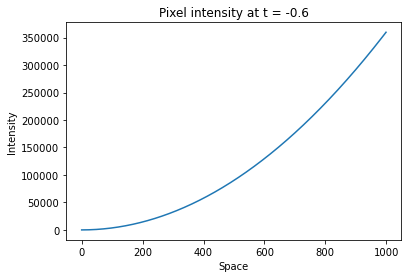

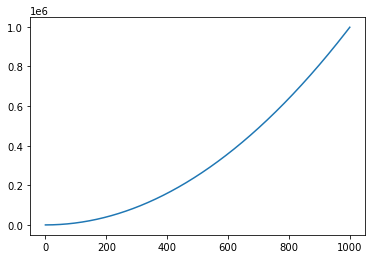

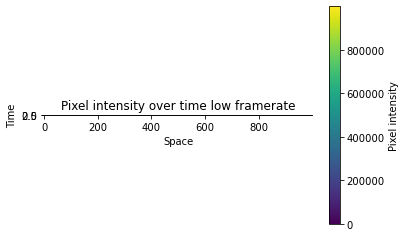

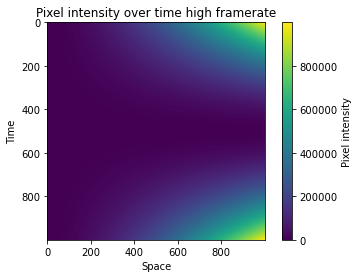

In [89]:
def intensity_function(x,t):
    I_0 = x
    I_1 = x#+ 10 * np.sin(x)#8 * np.sin(x / 16)
    I_2 = x**2# + 10 * np.cos(x)#8 * np.cos(x / 16)
    return I_0 + I_1 * t + I_2 * t**2

xs = np.arange(1000)

ts_hf = np.linspace(-1,1,1000)
reference_frames_hf = []
for t in ts_hf:
    reference_frames_hf.append(intensity_function(xs, t))
reference_frames_hf = np.array(reference_frames_hf)

ts_lf = np.linspace(-1,1,3)
reference_frames_lf = []
for t in ts_lf:
    reference_frames_lf.append(intensity_function(xs, t))# + np.random.normal(0, 0.1, 50)[0])
reference_frames_lf = np.array(reference_frames_lf)

t_n = -0.6
frame = intensity_function(xs, t_n)

plt.title(f"Pixel intensity at t = {t_n}")
plt.plot(frame)
plt.xlabel("Space")
plt.ylabel("Intensity")
plt.show()

plt.plot(reference_frames_hf[0,:])
plt.show()

plt.title("Pixel intensity over time low framerate")
plt.imshow(reference_frames_lf)
plt.ylabel("Time")
plt.xlabel("Space")
plt.colorbar(label = "Pixel intensity")
plt.show()

plt.title("Pixel intensity over time high framerate")
plt.imshow(reference_frames_hf)
plt.ylabel("Time")
plt.xlabel("Space")
plt.colorbar(label = "Pixel intensity")
plt.show()

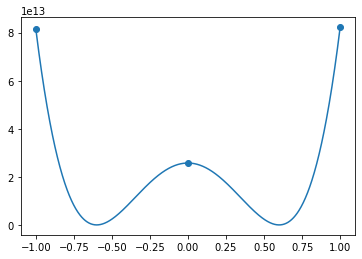

In [90]:
ssds_hf = []
for reference_frame in reference_frames_hf:
    ssd = np.sum((frame - reference_frame)**2)
    ssds_hf.append(ssd)

ssds_lf = []
for reference_frame in reference_frames_lf:
    ssd = np.sum((frame - reference_frame)**2)
    ssds_lf.append(ssd)

plt.plot(ts_hf, ssds_hf)
plt.scatter(ts_lf, ssds_lf)
plt.show()

(3, 1000)
[0. 0. 0.]
49999916666700.0
49501581833700.0
-49750083583200.0
[-1.  0.  1.]


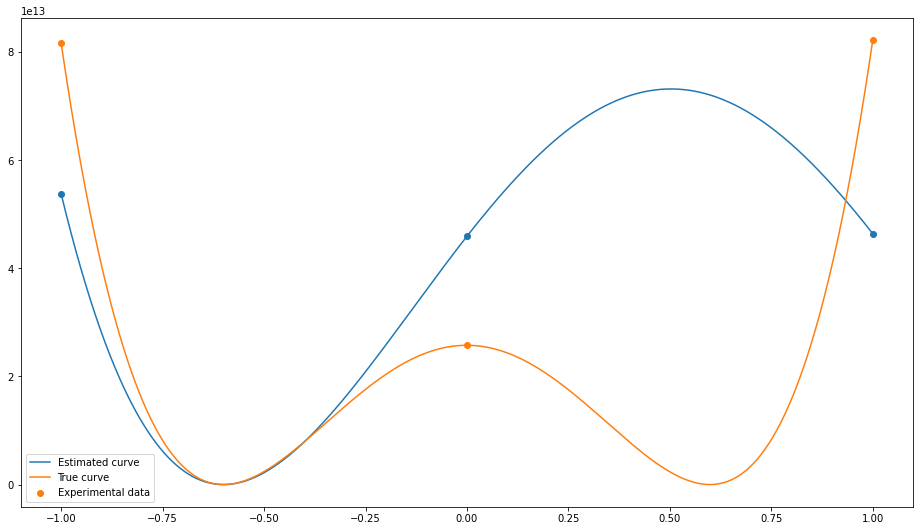

In [91]:
print(reference_frames_lf.shape)
print(reference_frames_lf[:,0])
for i in range(len(reference_frames_lf)):
    y_2 = reference_frames_lf[0]
    y_1 = reference_frames_lf[1]
    y_3 = reference_frames_lf[2]

    I_0 = y_2
    I_2 = (y_1 + y_3 - 2 * y_2) / 2
    I_1 = y_3 - I_2 - I_0

    I_1_squared = np.sum(I_1**2)
    I_2_squared = np.sum(I_2**2)
    I_1_times_I_2 = np.sum(I_1 * I_2)

print(I_1_squared)
print(I_2_squared)
print(I_1_times_I_2)

def fitting_function(t, t_n):
    return I_1_squared * (t - t_n)**2 + I_2_squared * (t**2 - t_n**2)**2 + 2 * I_1_times_I_2 * (t - t_n) * (t**2 - t_n**2)


print(ts_lf)
plt.figure(figsize = (16,9))
plt.plot(ts_hf, fitting_function(ts_hf, t_n), label = "Estimated curve")
plt.scatter(ts_lf, fitting_function(ts_lf, t_n))
plt.plot(ts_hf, ssds_hf, label = "True curve")
plt.scatter(ts_lf, ssds_lf, label = "Experimental data")
#plt.xlim(0.45, 0.55)
#plt.ylim(-5, 30)
plt.legend()
plt.show()